## Business Case:

ABC Tech is an mid-size organisation operation in IT-enabled business segment over a decade. On an average ABC Tech receives 22-25k ITincidents/tickets , which were handled to best practice ITIL framework with incident management , problem management, change managementand configuration management processes. These ITIL practices attained matured process level and a recent audit confirmed that further improvement initiatives may not yield return of investment. ABC Tech management is looking for ways to improve the incident management process as recent customer survey results shows that incident management is rated as poor.

Machine Learning as way to improve ITSM processes:<br>
ABC Tech management recently attended Machine Learning conference on ML for ITSM.<br>
Machine learning looks prospective to improve ITSM processes through prediction and automation. They came up with 4 key areas, where ML can help ITSM process in ABC Tech.<br>
1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.
2. Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.
3. Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.
4. Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

In [1]:
import os
import mysql.connector
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install pymysql

     -------------------------------------- 44.8/44.8 kB 442.7 kB/s eta 0:00:00


In [3]:
!pip install mysql-connector

     -------------------------------------- 11.9/11.9 MB 223.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp310-cp310-win_amd64.whl size=247958 sha256=a1487a0a9618236d4651e8b6b5386da8359ec092666daed1a7703311ee9ceaf8
  Stored in directory: c:\users\kaumudi\appdata\local\pip\cache\wheels\3e\7f\a3\928a40d1ffd01dd16057f308042377afc505d56145375adf40
Successfully built mysql-connector


In [2]:
connection=mysql.connector.connect(host = '18.136.157.135',user='dm_team', port='3306',password='DM!$Team@&27920!')

In [10]:
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_itsm',)


In [11]:
connection=mysql.connector.connect(host = '18.136.157.135',user='dm_team', port='3306',password='DM!$Team@&27920!',database='project_itsm')

In [12]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_itsm
0           dataset_list


In [14]:
from sqlalchemy import create_engine
query = "select * from dataset_list" 
data = pd.read_sql(query,connection)
data

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


In [15]:
data.to_csv('E:/DataMites/DataMites_Project/ISTM Project_Client/ITSM.csv')

In [3]:
data=pd.read_csv('ITSM.csv')
data.head()

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,...,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,...,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [4]:
# Drop unnamed column
data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
pd.set_option('display.max_columns', None)
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [6]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [7]:
data.shape

(46606, 25)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [9]:
# Checking for missing values
data.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [10]:
data.describe()

,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


In [11]:
data.describe(include='O')

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Category,KB_number,Alert_Status,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,Related_Interaction,Related_Change
count,46606,46495,46495,46606,46606,46606,46606,46606,46606,46606,46606,46606,2284,44826,46606,46605,46146,46606,560
unique,3019,12,64,274,46606,2,6,11,4,1825,1,34636,2244,33627,34528,30638,14,43060,232
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,incident,KM0001106,closed,24-03-2014 08:54,29-10-2013 15:03,10-10-2013 12:53,02-10-2013 15:20,0,Other,#MULTIVALUE,C00003013
freq,3050,32900,18811,13342,1,46597,22556,15526,37748,1106,46606,7,2,7,21,236,16470,3434,110


### Data Visualization

In [12]:
def value_count(data):
    for column in data:
        print('The value counts of {} column is'.format(column))
        print(data[column].value_counts())
        print('****************************************************************')
        print()

In [13]:
value_count(data)

The value counts of CI_Name column is
SUB000456    3050
SBA000263    2176
SBA000607    1743
SBA000462    1698
WBA000058    1614
             ... 
LAP001572       1
LAP000809       1
LAP000513       1
CBD000266       1
SWT000008       1
Name: CI_Name, Length: 3019, dtype: int64
****************************************************************

The value counts of CI_Cat column is
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: CI_Cat, dtype: int64
****************************************************************

The value counts of CI_Subcat column is
Server Based Application    18811
Web Based Application       15311
Desktop Application          3876
Laptop                  

#MULTIVALUE    3434
#N/B            114
SD0000007         1
SD0095431         1
SD0095433         1
               ... 
SD0045635         1
SD0045617         1
SD0045636         1
SD0045637         1
SD0147088         1
Name: Related_Interaction, Length: 43060, dtype: int64
****************************************************************

The value counts of No_of_Related_Incidents column is
1.0     1057
2.0       74
3.0       20
4.0       13
5.0        8
6.0        8
9.0        6
8.0        5
11.0       4
12.0       4
7.0        4
17.0       3
16.0       3
10.0       2
24.0       2
14.0       1
25.0       1
23.0       1
54.0       1
26.0       1
21.0       1
63.0       1
13.0       1
15.0       1
Name: No_of_Related_Incidents, dtype: int64
****************************************************************

The value counts of No_of_Related_Changes column is
1.0    536
2.0     21
3.0      2
9.0      1
Name: No_of_Related_Changes, dtype: int64
*********************************************

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

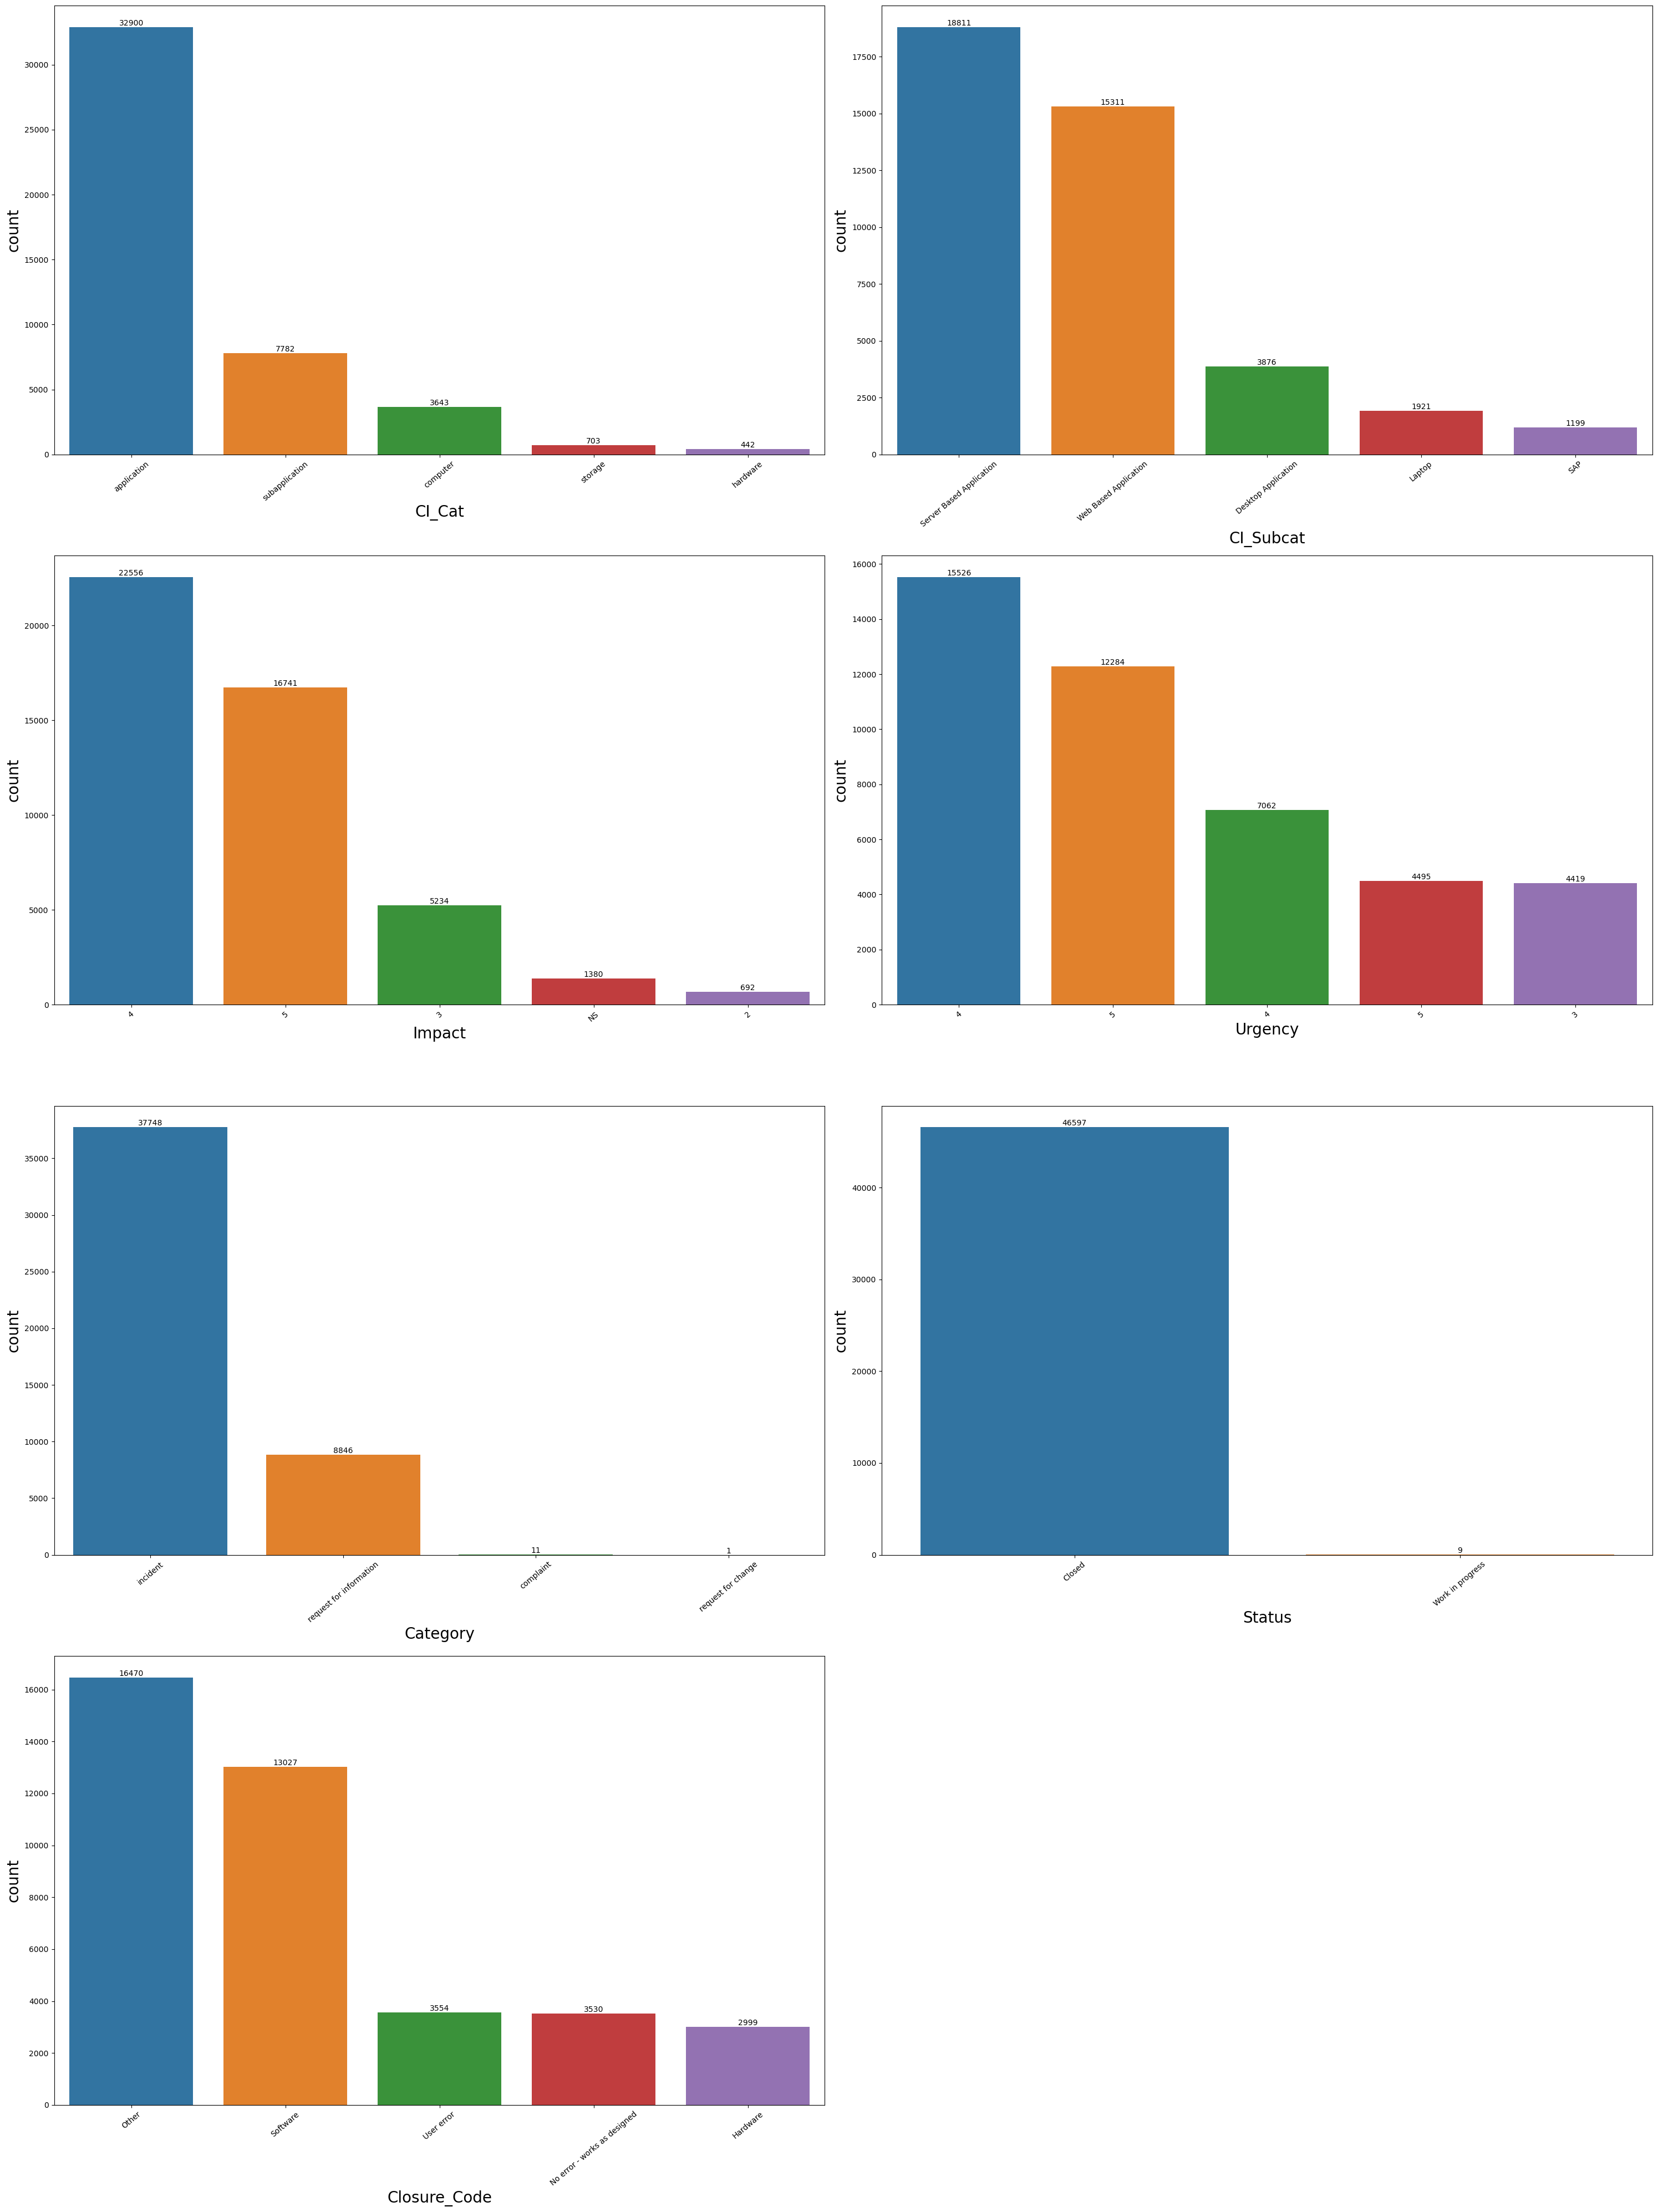

In [17]:
data1=data[['CI_Cat','CI_Subcat','Impact','Urgency','Category','Status','Closure_Code']]
# Dristribution of data
plt.figure(figsize=(30,40),facecolor="white")
plotnumber=1
for column in data1:
    top_values = data1[column].value_counts().head(5)
    if plotnumber<=7:
        ax=plt.subplot(4,2,plotnumber)
        sns.countplot(x=data1[column],order=top_values.index)
        plt.xlabel(column,fontsize=20)
        plt.ylabel("count",fontsize=20)
        plt.xticks(rotation=40)
        for i, count in enumerate(top_values):
            ax.annotate(str(count), xy=(i, count), ha='center', va='bottom')
    plotnumber+=1
plt.tight_layout()

* In CI-Cat, application is having more count compared to others.
* The Status of almost all of tickets is in closed state.
* In the impact and urgency columns most of the tickets are having imapct and urgency of either 4 or 5.
* The most of the tickets are belonging to the incident category.
* Others and software were indicated as the major closure code after the tikcet resloving

### Task 1:Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.

#### Data Processing / Data Munging

In [15]:
# CI Category and CI subcategory had a lot of labels which were replaced to only take the major ones. and unknown values replace by mode.

In [16]:
data.CI_Cat.value_counts()

application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: CI_Cat, dtype: int64

In [17]:
data.CI_Cat.replace(['database'],'storage',inplace=True)
data.CI_Cat.replace(['applicationcomponent'],'subapplication',inplace=True)
data.CI_Cat.replace(['displaydevice','officeelectronics','Phone','networkcomponents'],'hardware',inplace=True)
data.CI_Cat.replace(np.nan,'application',inplace=True)

In [18]:
pd.set_option('display.max_rows', None)
data.CI_Subcat.value_counts()

Server Based Application           18811
Web Based Application              15311
Desktop Application                 3876
Laptop                              1921
SAP                                 1199
Banking Device                       916
Citrix                               767
SAN                                  549
Client Based Application             492
Desktop                              423
DataCenterEquipment                  277
System Software                      272
Monitor                              212
Database                             211
Windows Server                       153
Controller                           146
Exchange                             130
Printer                               88
Omgeving                              86
Standard Application                  85
Scanner                               64
MigratieDummy                         60
Linux Server                          55
Automation Software                   55
Encryption      

In [19]:
data.CI_Subcat.replace('Desktop','Desktop Application',inplace=True)
data.CI_Subcat.replace(['Application Server','Virtual Tape Server','ESX Server','zOS Server','Neoview Server','X86 Server','Unix Server','Oracle Server','Windows Server in extern beheer','Thin Client','NonStop Server','Number','Windows Server','Linux Server',np.nan,'SharePoint Farm','Lines'],'Server Based Application',inplace=True)
data.CI_Subcat.replace('RAC Service','Banking Device',inplace=True)
data.CI_Subcat.replace(['Iptelephony','Protocol','Net Device','IPtelephony','ESX Cluster','Standard Application'],'Web Based Application',inplace=True)
data.CI_Subcat.replace(['VMWare','Security Software','zOS Systeem','Firewall','Database Software','VDI','Instance','MQ Queue Manager','Automation Software','Citrix','SAP','Encryption'],'System Software',inplace=True)
data.CI_Subcat.replace(['UPS','Omgeving'],'Client Based Application',inplace=True)
data.CI_Subcat.replace(['NonStop Storage','NonStop Harddisk','Tape Library','zOS Cluster','DataCenterEquipment','MigratieDummy'],'Database',inplace=True)
data.CI_Subcat.replace(['Modem','Router'],'Network Component',inplace=True)
data.CI_Subcat.replace('KVM Switches','Switch',inplace=True)

In [20]:
data.CI_Subcat.value_counts()

Server Based Application    19208
Web Based Application       15422
Desktop Application          4299
System Software              2363
Laptop                       1921
Banking Device                917
Client Based Application      579
Database                      570
SAN                           549
Monitor                       212
Controller                    146
Exchange                      130
Printer                        88
Scanner                        64
Switch                         60
Network Component              51
Keyboard                       27
Name: CI_Subcat, dtype: int64

In [21]:
data.No_of_Related_Interactions.replace(np.nan,1,inplace=True)
data.Priority.replace(np.nan,4,inplace=True)
data.No_of_Related_Incidents.replace(np.nan,0,inplace=True)
data.No_of_Related_Changes.replace(np.nan,0,inplace=True)

### Feature Selection

In [22]:
#The features which are available when the tickets arrives can be used to predict priority.Therefore, we have used only 4 predictors.

In [23]:
x = data.loc[:,['CI_Cat','CI_Subcat','WBS','Category']]
y = data.Priority

In [24]:
x.head()

,CI_Cat,CI_Subcat,WBS,Category
0,subapplication,Web Based Application,WBS000162,incident
1,application,Web Based Application,WBS000088,incident
2,application,Desktop Application,WBS000092,request for information
3,application,Web Based Application,WBS000088,incident
4,application,Web Based Application,WBS000088,incident


In [26]:
# Use encoding technique on input data
le= LabelEncoder()
for i in (0,1,2,3):
    x.iloc[:,i] = le.fit_transform(x.iloc[:,i])

In [27]:
x.head()

,CI_Cat,CI_Subcat,WBS,Category
0,5,16,137,1
1,0,16,70,1
2,0,4,74,3
3,0,16,70,1
4,0,16,70,1


In [29]:
# Splitting the data into test and train for calculating accuracy
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [30]:
# Apply standardization technique
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

### Model Building 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

### 1.K-Nearest Neghbor:

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=10)

In [33]:
y_pred_knn=knn_model.predict(x_test_scaled) # Predicting the model

In [34]:
score=accuracy_score(y_test,y_pred_knn)
score

0.8103275640108711

In [35]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.51      0.67      0.58       210
         3.0       0.64      0.60      0.62      1581
         4.0       0.81      0.89      0.84      7254
         5.0       0.90      0.77      0.83      4936

    accuracy                           0.81     13982
   macro avg       0.57      0.59      0.57     13982
weighted avg       0.81      0.81      0.81     13982



### 2.SVM:

In [36]:
svm_model=SVC(kernel='rbf',C=10,gamma=0.1)
svm_model.fit(x_train_scaled,y_train)

SVC(C=10, gamma=0.1)

In [37]:
y_pred_svm=svm_model.predict(x_test_scaled)

In [38]:
accuracy_score(y_test,y_pred_svm)

0.747604062365899

In [39]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.65      0.58       210
         3.0       0.55      0.31      0.39      1581
         4.0       0.72      0.89      0.80      7254
         5.0       0.87      0.68      0.76      4936

    accuracy                           0.75     13982
   macro avg       0.53      0.51      0.51     13982
weighted avg       0.75      0.75      0.74     13982



### 3.Random Forest Classifier

In [40]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [41]:
y_pred_rf=rf_model.predict(x_test_scaled)

In [42]:
accuracy_score(y_test,y_pred_rf)

0.81690745243885

In [43]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.66      0.59       210
         3.0       0.66      0.63      0.64      1581
         4.0       0.82      0.87      0.85      7254
         5.0       0.88      0.80      0.84      4936

    accuracy                           0.82     13982
   macro avg       0.58      0.59      0.58     13982
weighted avg       0.82      0.82      0.82     13982



### 4.Decision Tree:

In [44]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [45]:
y_pred_dt=dt_model.predict(x_test_scaled)

In [46]:
accuracy_score(y_test,y_pred_dt)

0.8168359319124588

In [47]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.69      0.59       210
         3.0       0.66      0.63      0.65      1581
         4.0       0.82      0.87      0.85      7254
         5.0       0.88      0.80      0.84      4936

    accuracy                           0.82     13982
   macro avg       0.58      0.60      0.58     13982
weighted avg       0.82      0.82      0.82     13982



### 5. Artificial Neural Network:

In [48]:
ann_model = MLPClassifier()
ann_model.fit(x_train_scaled,y_train)

MLPClassifier()

In [49]:
y_pred_ann=ann_model.predict(x_test_scaled)

In [50]:
accuracy_score(y_test,y_pred_ann)

0.7664139608067515

In [51]:
print(classification_report(y_test,y_pred_ann))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.65      0.58       210
         3.0       0.60      0.35      0.45      1581
         4.0       0.74      0.90      0.81      7254
         5.0       0.88      0.71      0.79      4936

    accuracy                           0.77     13982
   macro avg       0.55      0.52      0.53     13982
weighted avg       0.77      0.77      0.76     13982



In [52]:
from prettytable import PrettyTable
table=PrettyTable()
table.field_names = ['Sr.No',"Model","Accuracy"] 
table.add_row([1,"KNN",0.81 ])
table.add_row([2,"SVM", 0.75])
table.add_row([3,'Random Forest',0.82])
table.add_row([4,'Decision Tree',0.82])
table.add_row([5,'ANN',0.77])
print(table)

+-------+---------------+----------+
| Sr.No |     Model     | Accuracy |
+-------+---------------+----------+
|   1   |      KNN      |   0.81   |
|   2   |      SVM      |   0.75   |
|   3   | Random Forest |   0.82   |
|   4   | Decision Tree |   0.82   |
|   5   |      ANN      |   0.77   |
+-------+---------------+----------+


According to above table we can conclude that random forest classifier and Decision tree classifier best suit for given business case.

### Task 2:Forecast the incident volume in different fields, quarterly and annual.So that they can be better prepared with resources and technology planning.

In [8]:
# Selecting required columns for given business case.
data1=data[['Category','Open_Time']]

In [9]:
data1.head()

,Category,Open_Time
0,incident,05-02-2012 13:32
1,incident,12-03-2012 15:44
2,request for information,29-03-2012 12:36
3,incident,17-07-2012 11:49
4,incident,10-08-2012 11:01


In [10]:
data1.isnull().sum()

Category     0
Open_Time    0
dtype: int64

### Data Preprocessing:

In [12]:
data1['Open_Time']=data1['Open_Time'].apply(pd.to_datetime)
data1['Open_Time']=pd.to_datetime(data1['Open_Time']).dt.date

In [13]:
data1.head()

,Category,Open_Time
0,incident,2012-05-02
1,incident,2012-12-03
2,request for information,2012-03-29
3,incident,2012-07-17
4,incident,2012-10-08


In [14]:
# according to business case we are selecting the data where incident  tickets are raised.
data1=data1.loc[data1['Category']=='incident']
data1

,Category,Open_Time
0,incident,2012-05-02
1,incident,2012-12-03
3,incident,2012-07-17
4,incident,2012-10-08
5,incident,2012-10-08
...,...,...
46601,incident,2014-03-31
46602,incident,2014-03-31
46603,incident,2014-03-31
46604,incident,2014-03-31


In [15]:
data1['Open_Time'].min()

datetime.date(2012, 1, 10)

In [16]:
data1['Open_Time'].max()

datetime.date(2014, 12, 3)

In [17]:
# Adding new column which is having the frequency of date occured
data1['frequency'] = data1.groupby('Open_Time')['Category'].transform('count')

In [18]:
data1.drop_duplicates(inplace=True)

In [19]:
data1.index=pd.to_datetime(data1.Open_Time,dayfirst=True)

In [20]:
data1.head()

,Category,Open_Time,frequency
Open_Time,,,
2012-05-02,incident,2012-05-02,1
2012-12-03,incident,2012-12-03,1
2012-07-17,incident,2012-07-17,1
2012-10-08,incident,2012-10-08,2
2012-08-15,incident,2012-08-15,1


In [21]:
data1['Open_Time'].min()

datetime.date(2012, 1, 10)

In [29]:
data2=data1.loc[:,['frequency']]
data2.head()

,frequency
Open_Time,
2012-05-02,1
2012-12-03,1
2012-07-17,1
2012-10-08,2
2012-08-15,1


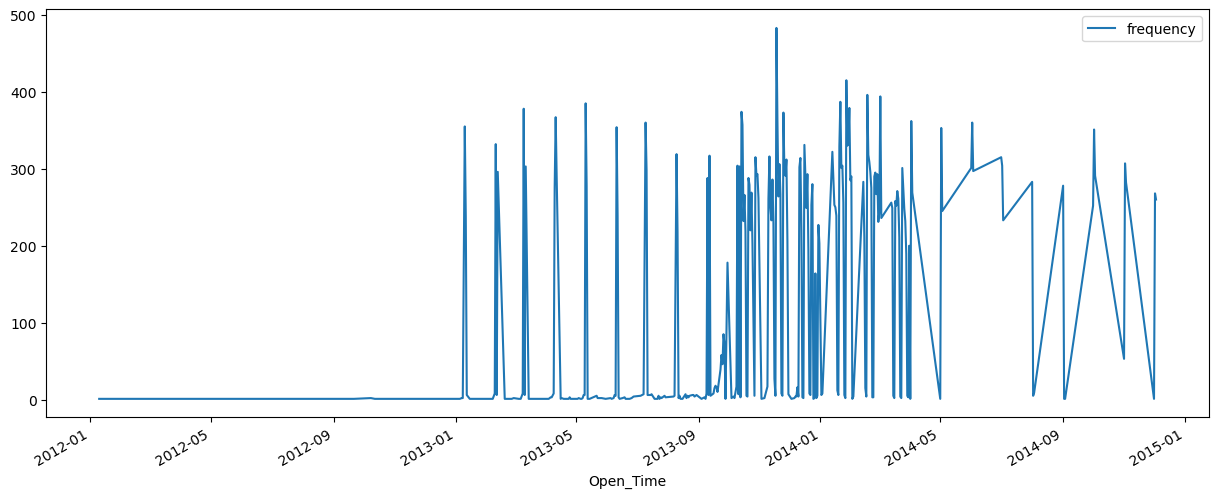

In [30]:
import matplotlib.pyplot as plt
data2.plot(figsize=(15,6))
plt.show()

In [31]:
# According to above plots i am considering the data above '2013/9/1', because in below dates there are no much frequencies.

In [32]:
data2=data2['2013-9-1':'2014-03-31']
data2.head()

,frequency
Open_Time,
2013-11-03,1
2013-12-03,1
2013-09-04,1
2013-10-04,2
2013-10-06,4


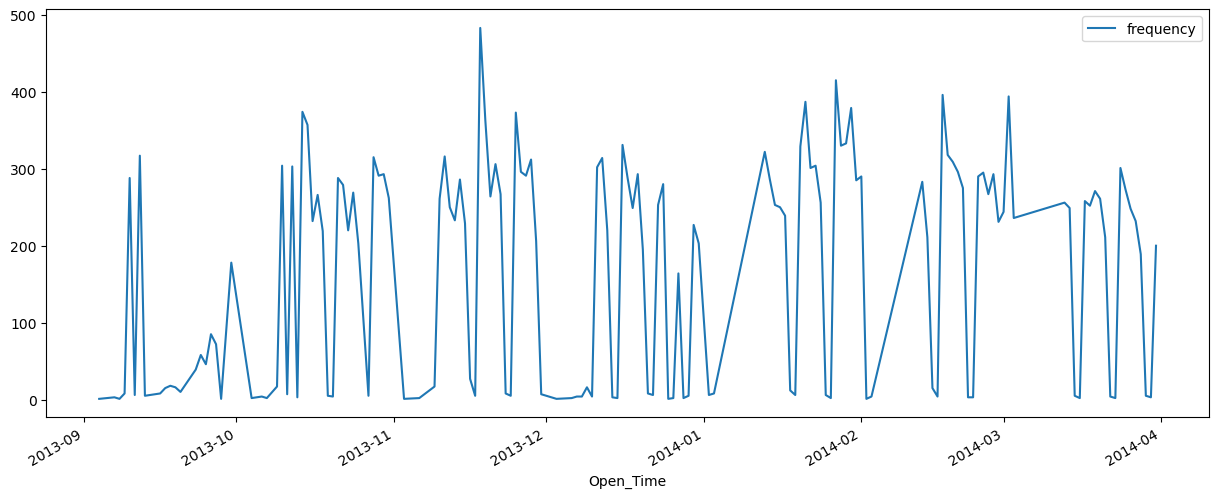

In [33]:
# Plotting number of tickets per day
import matplotlib.pyplot as plt
data2.plot(figsize=(15,6))
plt.show()

In [37]:
data2.drop_duplicates(inplace=True)

In [39]:
# Since not many tickets before October 2013, we consider only the latter values
import datetime as dt
incfrom2013 = data2[data2.index > dt.datetime(2013,10,1)]

In [40]:
# new Series
data3 = incfrom2013['frequency']
data3 = data3.asfreq('D')
data3.index

DatetimeIndex(['2013-10-04', '2013-10-05', '2013-10-06', '2013-10-07',
               '2013-10-08', '2013-10-09', '2013-10-10', '2013-10-11',
               '2013-10-12', '2013-10-13',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=179, freq='D')

In [41]:
# Making a list of values for p,d & q
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [42]:
data3 = pd.to_numeric(data3, errors='coerce')

In [44]:
# Checking the AIC values per pairs
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(data3,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:1072.9651168193948
ARIMA(0, 0, 1) - AIC:1031.9205707971457
ARIMA(0, 1, 0) - AIC:945.7632312796327
ARIMA(0, 1, 1) - AIC:908.2413740575738
ARIMA(1, 0, 0) - AIC:942.746764935117
ARIMA(1, 0, 1) - AIC:925.736924215352
ARIMA(1, 1, 0) - AIC:942.4355875754981
ARIMA(1, 1, 1) - AIC:922.9536622151525


In [45]:
# Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting
mod = sm.tsa.statespace.SARIMAX(data3,order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5037      0.101      4.995      0.000       0.306       0.701
ma.L1         -0.9774      0.037    -26.741      0.000      -1.049      -0.906
sigma2      8311.4442   1026.008      8.101      0.000    6300.506    1.03e+04


In [46]:
# Predicting the future values and the confidence interval
pred = results.get_prediction(start=pd.to_datetime('2014-3-3'),end=pd.to_datetime('2014-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

2014-03-03    334.0
2014-03-04    252.0
2014-03-05    260.0
2014-03-06    264.0
2014-03-07    266.0
              ...  
2014-10-26    258.0
2014-10-27    258.0
2014-10-28    258.0
2014-10-29    258.0
2014-10-30    258.0
Freq: D, Name: predicted_mean, Length: 242, dtype: float64

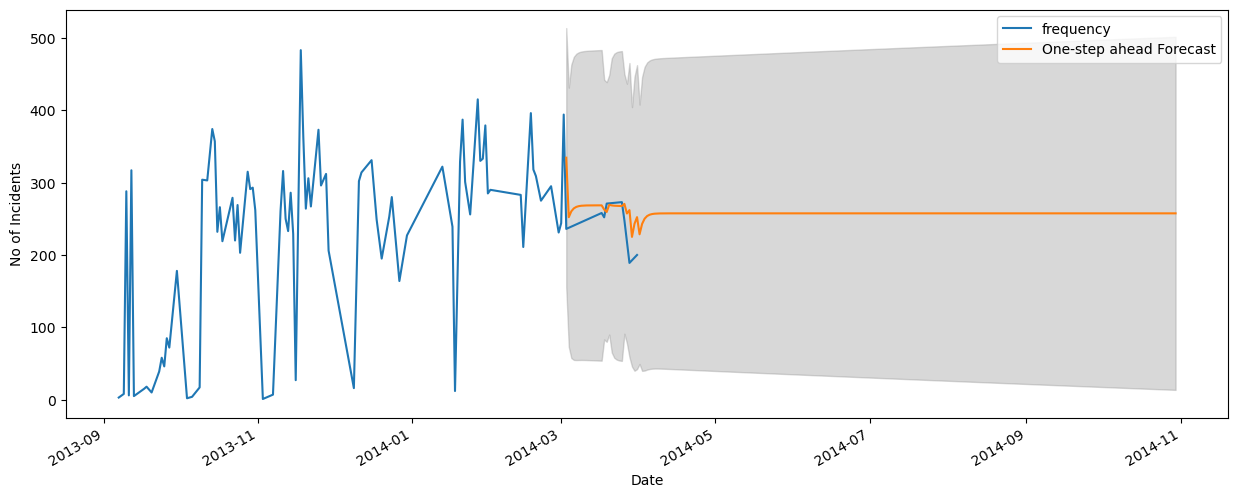

In [47]:
ax = data2['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()

From the above graph, we can observe the future prediction of Number of Incident volumes will occur.

### Task3: Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.

In [22]:
df=data.copy()

In [23]:
df=df[['CI_Name','CI_Cat','CI_Subcat','Category','Priority']]
df.head()

,CI_Name,CI_Cat,CI_Subcat,Category,Priority
0,SUB000508,subapplication,Web Based Application,incident,4.0
1,WBA000124,application,Web Based Application,incident,3.0
2,DTA000024,application,Desktop Application,request for information,4.0
3,WBA000124,application,Web Based Application,incident,4.0
4,WBA000124,application,Web Based Application,incident,4.0


In [24]:
# Checking missing values
df.isnull().sum()

CI_Name      0
CI_Cat       0
CI_Subcat    0
Category     0
Priority     0
dtype: int64

In [25]:
# Splitting data into x and y
x=df.drop(['CI_Cat'],axis=1)
y=df['CI_Cat']

In [26]:
# Use encoding technique on input data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in (0,1,2):
    x.iloc[:,i]=le.fit_transform(x.iloc[:,i])

In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CI_Name    46606 non-null  int32  
 1   CI_Subcat  46606 non-null  int32  
 2   Category   46606 non-null  int32  
 3   Priority   46606 non-null  float64
dtypes: float64(1), int32(3)
memory usage: 910.4 KB


In [28]:
x.head()

,CI_Name,CI_Subcat,Category,Priority
0,2741,16,1,4.0
1,2863,16,1,3.0
2,990,4,3,4.0
3,2863,16,1,4.0
4,2863,16,1,4.0


In [29]:
# Split data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=100)

In [30]:
y_train.value_counts()

application       26372
subapplication     6241
computer           2942
hardware            735
storage             730
software            264
Name: CI_Cat, dtype: int64

In [31]:
## balancing the data
smote=SMOTE(random_state=42)
x_smote,y_smote=smote.fit_resample(x_train.astype(float),y_train)

In [32]:
y_smote.shape

(158232,)

In [33]:
y_smote.value_counts()

application       26372
computer          26372
subapplication    26372
software          26372
storage           26372
hardware          26372
Name: CI_Cat, dtype: int64

### Model Building:

#### Logistic Regression:

In [36]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [37]:
y_pred_lr=lr.predict(x_test)

In [38]:
print(accuracy_score(y_test,y_pred_lr))

0.6995279982836301


In [44]:
print(classification_report(y_test,y_pred_lr))

                precision    recall  f1-score   support

   application       0.73      0.94      0.82      6639
      computer       0.40      0.31      0.35       701
      hardware       0.00      0.00      0.00       180
      software       0.00      0.00      0.00        69
       storage       0.00      0.00      0.00       187
subapplication       0.27      0.03      0.05      1546

      accuracy                           0.70      9322
     macro avg       0.23      0.21      0.20      9322
  weighted avg       0.59      0.70      0.62      9322



#### SVM:

In [45]:
svm=SVC(kernel='rbf',C=10,gamma=0.1)
svm.fit(x_train,y_train)

SVC(C=10, gamma=0.1)

In [46]:
y_pred_svm=svm.predict(x_test)

In [47]:
print(accuracy_score(y_test,y_pred_svm))

0.9993563612958593


In [48]:
print(classification_report(y_test,y_pred_svm))

                precision    recall  f1-score   support

   application       1.00      1.00      1.00      6639
      computer       1.00      1.00      1.00       701
      hardware       1.00      0.99      1.00       180
      software       1.00      0.97      0.99        69
       storage       0.99      0.99      0.99       187
subapplication       1.00      1.00      1.00      1546

      accuracy                           1.00      9322
     macro avg       1.00      0.99      1.00      9322
  weighted avg       1.00      1.00      1.00      9322



#### RandomForest Classifier:

In [49]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
y_pred_rf=rf.predict(x_test)

In [51]:
print(accuracy_score(y_test,y_pred_rf))

0.9997854537652864


In [52]:
print(classification_report(y_test,y_pred_rf))

                precision    recall  f1-score   support

   application       1.00      1.00      1.00      6639
      computer       1.00      1.00      1.00       701
      hardware       1.00      1.00      1.00       180
      software       1.00      1.00      1.00        69
       storage       1.00      0.99      1.00       187
subapplication       1.00      1.00      1.00      1546

      accuracy                           1.00      9322
     macro avg       1.00      1.00      1.00      9322
  weighted avg       1.00      1.00      1.00      9322



#### KNN:

In [53]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
y_pred_knn=knn.predict(x_test)

In [55]:
print(accuracy_score(y_test,y_pred_knn))

0.9991418150611456


#### ANN:

In [56]:
ann=MLPClassifier()
ann.fit(x_train,y_train)

MLPClassifier()

In [58]:
y_pred_ann=ann.predict(x_test)

In [59]:
accuracy_score(y_test,y_pred_ann)

0.7386826861188586

In [60]:
print(classification_report(y_test,y_pred_ann))

                precision    recall  f1-score   support

   application       0.73      1.00      0.85      6639
      computer       0.89      0.28      0.43       701
      hardware       0.00      0.00      0.00       180
      software       1.00      0.13      0.23        69
       storage       1.00      0.22      0.37       187
subapplication       0.00      0.00      0.00      1546

      accuracy                           0.74      9322
     macro avg       0.60      0.27      0.31      9322
  weighted avg       0.62      0.74      0.64      9322



In [62]:
table=PrettyTable()
table.field_names = ['Sr.No',"Model","Accuracy"] 
table.add_row([1,"Logistic Regression",0.69 ])
table.add_row([2,"SVM", 0.99])
table.add_row([3,'KNN',0.99])
table.add_row([4,'Random Forest',0.99])
table.add_row([5,'ANN',0.74])
print(table)

+-------+---------------------+----------+
| Sr.No |        Model        | Accuracy |
+-------+---------------------+----------+
|   1   | Logistic Regression |   0.69   |
|   2   |         SVM         |   0.99   |
|   3   |         KNN         |   0.99   |
|   4   |    Random Forest    |   0.99   |
|   5   |         ANN         |   0.74   |
+-------+---------------------+----------+


From above table,observed that SVM,KNN and RandomForest classifier algorithms give good accuracy.

### Task4: Predict RFC (Request for change) and possible failure /misconfiguration of ITSM assets.

In [68]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,0.0,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,0.0,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,4.0,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,0.0,0.0,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,0.0,0.0,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,0.0,0.0,NaN


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46606 non-null  object 
 2   CI_Subcat                   46606 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    46606 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

Data for this task is not sufficient so we can not solve these business case.